In [1]:
# Polynomial Regression

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [27]:
# Import dataset
dataset = pd.read_csv('claim_per_policy.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1:].values

In [28]:
dataset

,Age,Claim per policy
0,15,31177
1,20,34086
2,25,36867
3,30,42452
4,35,44681
5,40,46986
6,45,46033
7,50,47341
8,55,48762
9,60,52408


In [3]:
dataset.shape

(12, 2)

In [4]:
X.shape

(12, 1)

In [5]:
y

array([31177, 34086, 36867, 42452, 44681, 46986, 46033, 47341, 48762,
       52408, 58741, 75856])

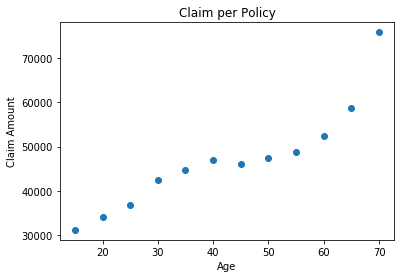

In [6]:
# Visualise dataset
plt.scatter(X, y)
plt.title('Claim per Policy')
plt.xlabel('Age')
plt.ylabel('Claim Amount')
plt.show()

In [8]:
# Simple Linear Regression for entire dataset (For comparison)
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
# Polynomial Regression for entire dataset (polynomial fit followed by Linear regression)
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 5)
X_poly = poly_features.fit_transform(X)
y_poly=poly_features.fit_transform(y)
#poly_features.fit(X_poly, y)
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
X.shape

(12, 1)

In [35]:
X_poly

array([[1.00000000e+00, 1.50000000e+01, 2.25000000e+02, 3.37500000e+03,
        5.06250000e+04, 7.59375000e+05],
       [1.00000000e+00, 2.00000000e+01, 4.00000000e+02, 8.00000000e+03,
        1.60000000e+05, 3.20000000e+06],
       [1.00000000e+00, 2.50000000e+01, 6.25000000e+02, 1.56250000e+04,
        3.90625000e+05, 9.76562500e+06],
       [1.00000000e+00, 3.00000000e+01, 9.00000000e+02, 2.70000000e+04,
        8.10000000e+05, 2.43000000e+07],
       [1.00000000e+00, 3.50000000e+01, 1.22500000e+03, 4.28750000e+04,
        1.50062500e+06, 5.25218750e+07],
       [1.00000000e+00, 4.00000000e+01, 1.60000000e+03, 6.40000000e+04,
        2.56000000e+06, 1.02400000e+08],
       [1.00000000e+00, 4.50000000e+01, 2.02500000e+03, 9.11250000e+04,
        4.10062500e+06, 1.84528125e+08],
       [1.00000000e+00, 5.00000000e+01, 2.50000000e+03, 1.25000000e+05,
        6.25000000e+06, 3.12500000e+08],
       [1.00000000e+00, 5.50000000e+01, 3.02500000e+03, 1.66375000e+05,
        9.15062500e+06, 

In [36]:
# Predict with Linear Regression for Age: 57
lr_pred = linear_regressor.predict(np.array([[15]]))

In [37]:
print("Linear prediction for Age: 15")
print(lr_pred)


Linear prediction for Age: 15
[30563.37179487]


In [43]:
# Predict with Polynomial Regression for Age: 57
poly_pred = poly_regressor.predict(poly_features.fit_transform(np.array([[15]])))
print("Polynomial prediction for Age: 15")
print(poly_pred)


Polynomial prediction for Age: 15
[[31168.13492377]]


In [25]:
dataset.head()

,Age,Claim per policy
0,15,31177
1,20,34086
2,25,36867
3,30,42452
4,35,44681


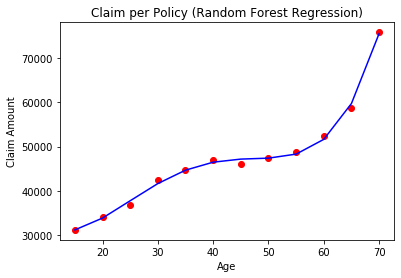

In [32]:
plt.scatter(X, y, color = 'red')
plt.plot(X, poly_regressor.predict(X_poly), color = 'blue')
plt.title('Claim per Policy (Random Forest Regression)')
plt.xlabel('Age')
plt.ylabel('Claim Amount')
plt.show()

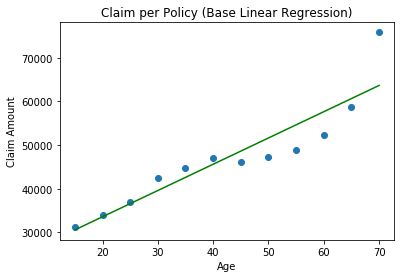

In [33]:
plt.scatter(X, y)
plt.plot(X, linear_regressor.predict(X), color = 'green')
plt.title('Claim per Policy (Base Linear Regression)')
plt.xlabel('Age')
plt.ylabel('Claim Amount')
plt.show()

In [49]:
from sklearn import svm
supp_reg=svm.SVR(C=2,degree=5)
supp_reg.fit(X,y)

/home/govinth/anaconda3/envs/deeplearn/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/govinth/anaconda3/envs/deeplearn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=2, cache_size=200, coef0=0.0, degree=5, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [50]:
y_supp_pred=supp_reg.predict(np.array([[15]]))

In [51]:
y_supp_pred

array([46507.5])

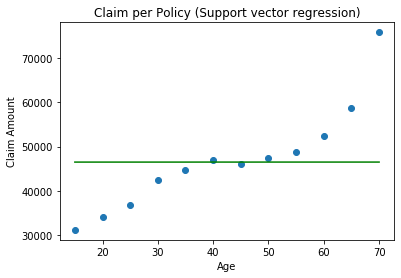

In [52]:
plt.scatter(X, y)
plt.plot(X, supp_reg.predict(X), color = 'green')
plt.title('Claim per Policy (Support vector regression)')
plt.xlabel('Age')
plt.ylabel('Claim Amount')
plt.show()